<a href="https://colab.research.google.com/github/Ayesha-Noor-8874/Airbnb-Host-Analysis/blob/main/AirBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
class DataLoader:
    def __init__(self, file_path):
        self.file_path = file_path
    def load_data(self):
        """Loads CSV dataset."""
        self.df = pd.read_csv(self.file_path, on_bad_lines='skip', low_memory=False)
        print("📌 Dataset loaded successfully!")
        print("Shape:", self.df.shape)
        return self.df
#basic info
    def show_basic_info(self):
        print("\n===== BASIC INFO =====")
        print(self.df.info())
        print("\n===== FIRST 5 ROWS =====")
        print(self.df.head())
        print("\n===== MISSING VALUES =====")
        print(self.df.isnull().sum())
    #remove Duplicates
    def remove_duplicates(self):
        """Removes duplicate rows."""
        before = self.df.shape[0]
        self.df.drop_duplicates(inplace=True)
        after = self.df.shape[0]
        print(f"\n Removed {before - after} duplicate rows.")
        return self.df
#handle missing values
    def handle_missing_values(self):
        """Handles missing numeric & categorical values."""
        numeric = self.df.select_dtypes(include=['float64', 'int64']).columns
        categorical = self.df.select_dtypes(include=['object']).columns

        # Numeric → median
        self.df[numeric] = self.df[numeric].fillna(self.df[numeric].median())
        # Categorical → mode
        self.df[categorical] = self.df[categorical].fillna(self.df[categorical].mode().iloc[0])

        print("\n📌 Missing values handled.")
        print(self.df.isnull().sum())
        return self.df
    # Standardize column names
    def standardize_column_names(self):
        """Standardizes column names to be lowercase and use underscores."""
        self.df.columns = self.df.columns.str.lower().str.replace(' ', '_')
        # Specific renames for consistency with HostAnalysis class
        if 'review_rate_number' in self.df.columns:
            self.df.rename(columns={'review_rate_number': 'review_scores_value'}, inplace=True)
        print("\n📌 Column names standardized.")
        print(self.df.columns.tolist())
        return self.df
      #Covert DataTypes
    def convert_columns(self):
        """Convert price & percentages if they exist."""
        if "price" in self.df.columns:
            self.df["price"] = (
                self.df["price"]
                .astype(str)
                .str.replace("$", "", regex=False)
                .str.replace(",", "", regex=False)
                .astype(float)
            )
        if "host_response_rate" in self.df.columns:
            self.df["host_response_rate"] = (
                self.df["host_response_rate"]
                .astype(str)
                .str.replace("%", "", regex=False)
                .astype(float)
            )
        if "host_acceptance_rate" in self.df.columns:
            self.df["host_acceptance_rate"] = (
                self.df["host_acceptance_rate"]
                .astype(str)
                .str.replace("%", "", regex=False)
                .astype(float)
            )
        print("\n📌 Column types after conversion:")
        print(self.df.dtypes)
        return self.df

In [4]:
class PriceAnalysis:
    def __init__(self, df):
        self.df = df
    def price_summary(self):
        print("\n===== PRICE SUMMARY =====")
        return self.df["price"].describe()
    def price_by_room_type(self):
        if "room_type" not in self.df.columns:
            return "room_type column not found."
        print("\n===== AVERAGE PRICE BY ROOM TYPE =====")
        return self.df.groupby("room_type")["price"].mean()
    def price_by_neighbourhood(self):
        if "neighbourhood" not in self.df.columns:
            return "neighbourhood column not found."
        print("\n===== TOP 10 EXPENSIVE NEIGHBOURHOODS =====")
        return (
            self.df.groupby("neighbourhood")["price"]
            .mean()
            .sort_values(ascending=False)
            .head(10)
        )
    def most_expensive_listings(self):
        print("\n===== TOP 10 MOST EXPENSIVE LISTINGS =====")
        return self.df.sort_values(by="price", ascending=False).head(10)
    def correlation_with_price(self):
        print("\n===== CORRELATION WITH PRICE =====")
        num = self.df.select_dtypes(include=['float64', 'int64'])
        return num.corr()["price"].sort_values(ascending=False)

In [5]:
class HostAnalysis:
    def __init__(self, df):
        self.df = df
    def top_hosts(self):
        print("\n===== TOP 10 HOSTS BY LISTINGS =====")
        if "host_id" not in self.df.columns:
            return "host_id column not found."
        return self.df["host_id"].value_counts().head(10)
    def host_response_rates(self):
        if "host_response_rate" not in self.df.columns:
            return "host_response_rate column not found."
        print("\n===== AVERAGE HOST RESPONSE RATE =====")
        return self.df.groupby("host_id")["host_response_rate"].mean()
    def host_acceptance_rates(self):
        if "host_acceptance_rate" not in self.df.columns:
            return "host_acceptance_rate column not found."
        print("\n===== AVERAGE HOST ACCEPTANCE RATE =====")
        return self.df.groupby("host_id")["host_acceptance_rate"].mean()
    def host_review_scores(self):
        if "review_scores_value" not in self.df.columns:
            return "review_scores_value column not found."
        print("\n===== AVERAGE HOST REVIEW SCORE =====")
        return self.df.groupby("host_id")["review_scores_value"].mean()
    def availability_stats(self):
        if "availability_365" not in self.df.columns:
            return "availability_365 column not found."
        print("\n===== HOST AVAILABILITY STATS =====")
        return self.df.groupby("host_id")["availability_365"].mean()

**Matplotlib**

In [13]:
class Visualizer:
    def __init__(self, df):
        self.df = df

    def price_distribution(self):
        plt.figure(figsize=(10, 5))
        plt.hist(self.df["price"], bins=50, edgecolor="black")
        plt.title("Price Distribution")
        plt.xlabel("Price")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

    def price_by_room_type(self):
        plt.figure(figsize=(8, 5))
        avg = self.df.groupby("room_type")["price"].mean()
        avg.plot(kind="bar", color="skyblue", edgecolor="black")
        plt.title("Average Price by Room Type")
        plt.ylabel("Price")
        plt.grid(axis='y')
        plt.show()

    def price_by_neighbourhood(self):
        plt.figure(figsize=(12, 6))
        top10 = (
            self.df.groupby("neighbourhood")["price"]
            .mean()
            .sort_values(ascending=False)
            .head(10)
        )
        top10.plot(kind="bar", color="orange", edgecolor="black")
        plt.title("Top 10 Expensive Neighbourhoods")
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.show()

    def price_vs_reviews(self):
        plt.figure(figsize=(8, 5))
        plt.scatter(self.df["number_of_reviews"], self.df["price"], alpha=0.4,edgecolors="black")
        plt.title("Price vs Number of Reviews")
        plt.xlabel("Number of Reviews")
        plt.ylabel("Price")
        plt.grid(True)
        plt.show()

    def top_hosts(self):
        plt.figure(figsize=(10, 5))
        top = self.df["host_id"].value_counts().head(10)
        top.plot(kind="bar", edgecolor="black")
        plt.title("Top 10 Hosts by Listings")
        plt.ylabel("Listings")
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.show()


**Main Code**

📌 Dataset loaded successfully!
Shape: (102599, 26)

===== BASIC INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  ins

/tmp/ipython-input-2291569094.py:35: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.df[categorical] = self.df[categorical].fillna(self.df[categorical].mode().iloc[0])



📌 Missing values handled.
id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
house_rules                       0
license                           0
dtype: int64

📌 Column names standard

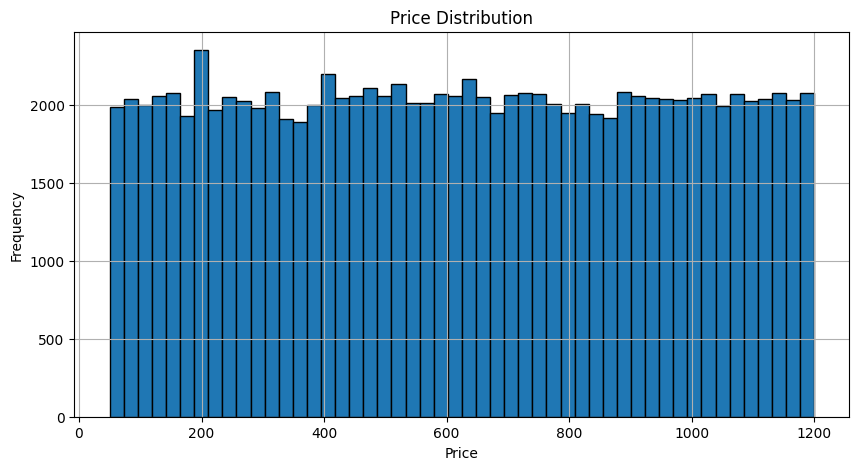

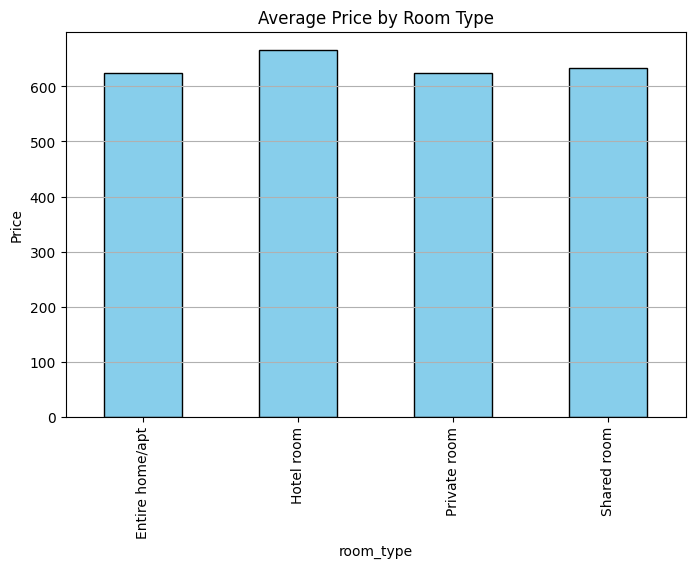

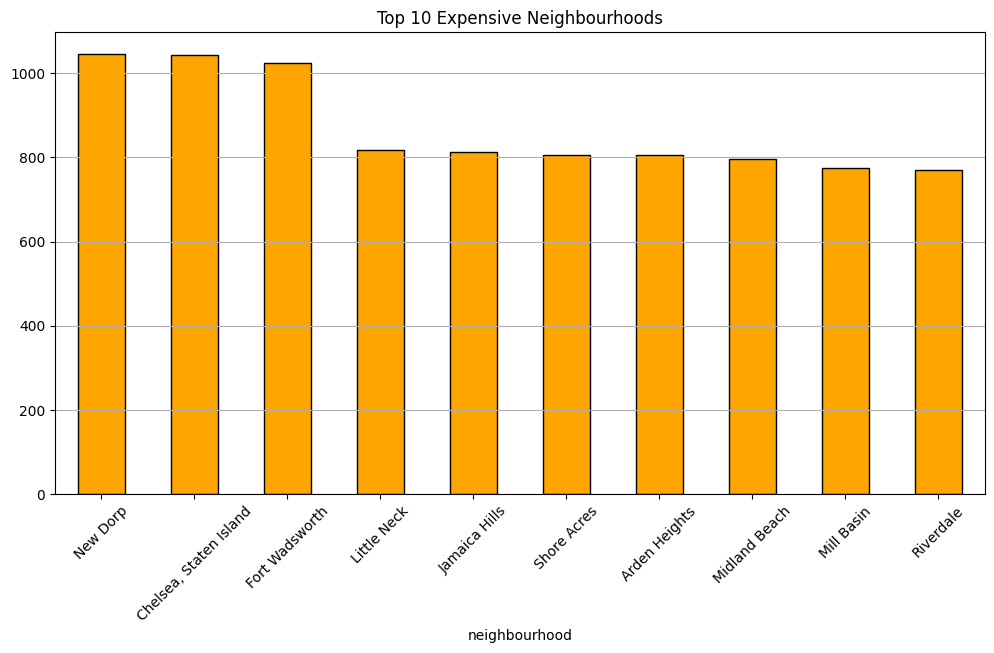

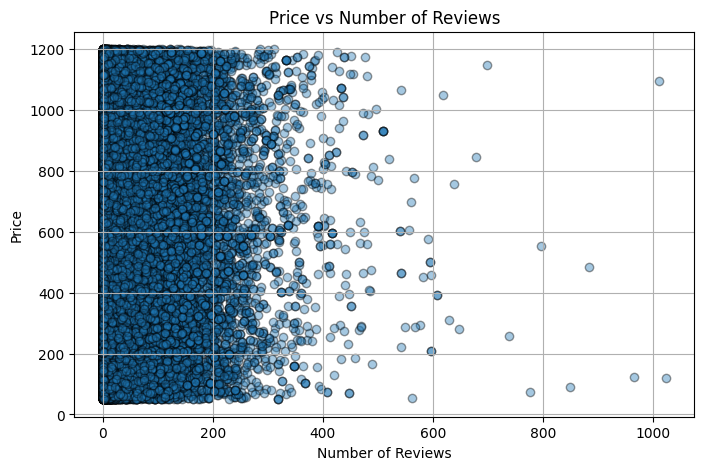

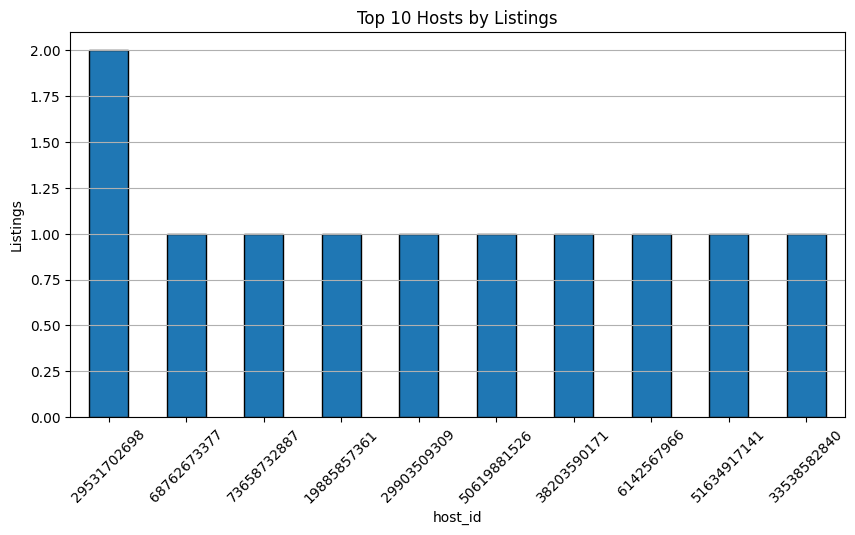

In [25]:
# Load & clean dataset
loader = DataLoader("../Airbnb_Open_Data.csv")

df = loader.load_data()
loader.show_basic_info()
df = loader.remove_duplicates()
df = loader.handle_missing_values()
df = loader.standardize_column_names() # Call the new method
df = loader.convert_columns()

# Price analysis
price = PriceAnalysis(df)
print(price.price_summary())
print(price.price_by_room_type())
print(price.price_by_neighbourhood())
print(price.most_expensive_listings())
print(price.correlation_with_price())

# Host analysis
host = HostAnalysis(df)
# Modify print calls to handle potential string returns from HostAnalysis methods
# if columns are still not found after standardization.
# host_response_rate and host_acceptance_rate are not in the raw data,
# so these will still likely return strings.
print(host.top_hosts())
print(host.host_response_rates()) # Removed .head()
print(host.host_acceptance_rates()) # Removed .head()
print(host.host_review_scores()) # Removed .head()
print(host.availability_stats()) # Removed .head()

# Visualization
viz = Visualizer(df)

viz.price_distribution()
viz.price_by_room_type()
viz.price_by_neighbourhood()
viz.price_vs_reviews()
viz.top_hosts()
